# Pacotes

In [1]:
import warnings
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [2]:
def missing_values_table(df):
    """
    Cria uma tabela resumindo a quantidade e a porcentagem de valores ausentes em cada coluna do DataFrame.

    Args:
    df (pd.DataFrame): DataFrame para análise de valores ausentes.

    Etapas:
    1. Calcular a quantidade total de valores ausentes por coluna.
    2. Calcular a porcentagem de valores ausentes em relação ao total de linhas.
    3. Concatenar as duas métricas em um novo DataFrame.
    4. Renomear as colunas do DataFrame resultante para maior clareza.
    5. Filtrar e ordenar o DataFrame para mostrar apenas colunas com valores ausentes, em ordem decrescente de porcentagem.
    6. Imprimir um resumo sobre a presença de valores ausentes no DataFrame.

    Returns:
    pd.DataFrame: Uma tabela com o número e a porcentagem de valores ausentes por coluna.
    """
    # Calculando o número total de valores ausentes por coluna.
    mis_val = df.isnull().sum()
    
    # Calculando a porcentagem de valores ausentes.
    mis_val_percent = 100 * mis_val / len(df)
    
    # Criando um DataFrame com o número e a porcentagem de valores ausentes.
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renomeando as colunas do DataFrame para clareza.
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Filtrando o DataFrame para mostrar apenas colunas com valores ausentes e ordenando-as.
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # Imprimindo um resumo das colunas com valores ausentes.
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    return mis_val_table_ren_columns

    """
    Ajusta a altura das barras em um gráfico de barras vertical no Matplotlib.

    Args:
    ax (matplotlib.axes._subplots.AxesSubplot): Objeto Axes do Matplotlib.
    new_value (float): Nova altura das barras.

    Etapas:
    1. Iterar sobre cada barra no gráfico.
    2. Ajustar a altura da barra para o novo valor.
    3. Centralizar a barra verticalmente após o ajuste.

    Returns:
    None: A função modifica o gráfico diretamente, sem retornar um valor.
    """
    # Iterando sobre cada barra no gráfico para ajustar a altura.
    for patch in ax.patches:
        current_height = patch.get_height()
        diff = current_height - new_value
        
        # Ajustando a altura e reposicionando a barra.
        patch.set_height(new_value)
        patch.set_y(patch.get_y() + diff * 0.5)

def add_annotations_percentage_y(ax, df_length, size=10, rotation= 0):
    """
    Adiciona anotações de porcentagem a um gráfico de barras horizontal no Matplotlib.

    Args:
    ax (matplotlib.axes._subplots.AxesSubplot): Objeto Axes do Matplotlib.
    df_length (int): Comprimento do DataFrame ou valor total para cálculo de porcentagens.
    size (int): Tamanho da fonte das anotações.

    Etapas:
    1. Verificar se 'df_length' é zero para evitar divisão por zero.
    2. Iterar sobre cada barra no gráfico.
    3. Calcular a porcentagem e adicionar a anotação à direita da barra.

    Returns:
    None: A função modifica o gráfico diretamente, sem retornar um valor.
    """
    # Verificando se o comprimento do DataFrame é zero para evitar divisão por zero.
    if df_length == 0:
        return
    
    # Iterando sobre cada barra para adicionar anotações de porcentagem.
    for bar in ax.patches:
        width = bar.get_width()
        percentage = '{:.1f}%'.format(100 * width / df_length)
        
        # Adicionando a anotação de porcentagem à barra.
        ax.annotate(percentage,
                    (width, bar.get_y() + bar.get_height() / 2), 
                    ha='left', va='center', rotation=rotation,
                    size=size, xytext=(5, 0),
                    textcoords='offset points')
        

def add_annotations_percentage_x(ax, df_length, size=10, rotation= 0):
    """
    Adiciona anotações de porcentagem acima das barras em um gráfico de barras vertical no Matplotlib.

    Parâmetros:
    ax (matplotlib.axes._subplots.AxesSubplot): Objeto Axes do Matplotlib.
    df_length (int): Comprimento do DataFrame ou valor total para cálculo de porcentagens.
    size (int): Tamanho da fonte das anotações.

    Retorna:
    None: A função modifica o gráfico diretamente, sem retornar um valor.
    """
    
    # Verificando se o comprimento do DataFrame é zero para evitar divisão por zero.
    if df_length == 0:
        return  # Saindo da função se df_length é zero.

    # Iterando sobre cada barra no gráfico.
    for bar in ax.patches:
        # Calculando a porcentagem da altura da barra em relação ao comprimento total do DataFrame.
        height = bar.get_height()
        percentage = '{:.1f}%'.format(100 * height / df_length) if df_length else '0%'

        # Adicionando a anotação de porcentagem acima da barra.
        # A anotação é centralizada horizontalmente na barra e posicionada logo acima dela.
        ax.annotate(percentage,
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom',  rotation=rotation,
                    size=size, xytext=(0, 3),
                    textcoords='offset points')

# Função para calcular VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Carregando Dataset

In [3]:
dic = {
    'font.sans-serif': ['Arial'],  # Fonte
    'font.family': ['Arial']}
sns.set_style(rc=dic)
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [4]:
dfs = pd.read_excel('ModeloVigente_DadosCP62_2023.xlsx', sheet_name='Sheet 1')

In [5]:
# Configurar o pandas para mostrar números completos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Renomear as colunas para remover espaços
dfs.columns = dfs.columns.str.replace(' ', '_')

In [7]:
dfs.head()

,DMU,Codigo,PMSO,rede_alta,rede_subterranea,rede_aerea,mercadoP,cons,CHI,PNT
0,RGE SUL (FUSAO 3),D01f,872875.834,4316.129,73.295,152713.282,8369799.117,2900561.667,14417450.720,394123.495
1,AMAZONAS,D02,810650.018,250.560,36.711,35967.862,2758708.609,1032967.000,6862142.925,1957040.451
2,ENEL RJ,D03,780334.203,3665.902,3283.996,54738.023,5618601.494,2688391.333,16483600.360,753479.604
3,BANDEIRANTE,D04,473808.857,1034.272,220.411,28192.829,5300379.297,1934474.000,3941057.287,269641.164
4,BOA VISTA ENERGIA,D05,162246.335,712.923,0.050,16307.496,642846.856,172172.000,1024922.675,135664.913


In [6]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DMU               52 non-null     object 
 1   Codigo            52 non-null     object 
 2   PMSO              52 non-null     float64
 3   rede_alta         52 non-null     float64
 4   rede_subterranea  52 non-null     float64
 5   rede_aerea        52 non-null     float64
 6   mercadoP          52 non-null     float64
 7   cons              52 non-null     float64
 8   CHI               52 non-null     float64
 9   PNT               52 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.2+ KB


In [8]:
dfs.describe()

,PMSO,rede_alta,rede_subterranea,rede_aerea,mercadoP,cons,CHI,PNT
count,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000
mean,484353.942,2416.639,403.115,70862.938,3919206.856,1625136.628,6754251.617,244591.338
std,536654.056,3262.809,843.470,95913.700,4800544.842,1961824.386,8664597.534,412203.726
min,2320.103,0.000,0.000,71.673,10913.805,3773.667,0.000,0.000
25%,33776.577,58.466,0.000,3134.130,208507.833,101832.500,17527.267,3151.038
50%,338802.409,1249.778,22.391,33396.888,2316725.345,1037062.500,3367755.322,53871.998
75%,726569.718,3731.913,321.032,110571.630,5379934.846,2690253.250,11799042.047,291209.606
max,2448650.839,17436.323,3283.996,520266.354,21780368.080,8560418.667,40601260.630,1957040.451


In [16]:
print(f'Quantidade de Linhas:{ dfs.shape[0]}')
print(f'Quantidade de Colunas:{ dfs.shape[1]}')

Quantidade de Linhas:52
Quantidade de Colunas:10


In [10]:
dfs.DMU.value_counts()

DMU
RGE SUL (FUSAO 3)     1
AMAZONAS              1
CPFL - PAULISTA       1
DEMEI                 1
DME-PC                1
ENERGISA BO           1
JOAOCESA              1
EFLUL                 1
ELEKTRO               1
ELETROACRE            1
ELETROCAR             1
ELETROPAULO           1
SANTAMARIA            1
ENERGISA MG           1
ENERGISA MS           1
ENF                   1
ENERGISA PB           1
ESCELSA               1
ENERGISA SE           1
FORCEL                1
HIDROPAN              1
IENERGIA              1
LIGHT                 1
MUXFELDT              1
SULGIPE               1
CPFL - PIRATININGA    1
COSERN                1
COPEL                 1
CELPE                 1
ENEL RJ               1
BANDEIRANTE           1
BOA VISTA ENERGIA     1
ESS (FUSAO 1)         1
CEAL                  1
CEB                   1
CEEE                  1
CELESC                1
CELG                  1
CELPA                 1
CELTINS               1
COOPERALIANÇA         1
CEMAR       

In [ ]:
dfs.Codigo.value_counts()

# Análise descritiva

## Missing Values

In [17]:
missing_values_table(dfs)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


<Axes: >

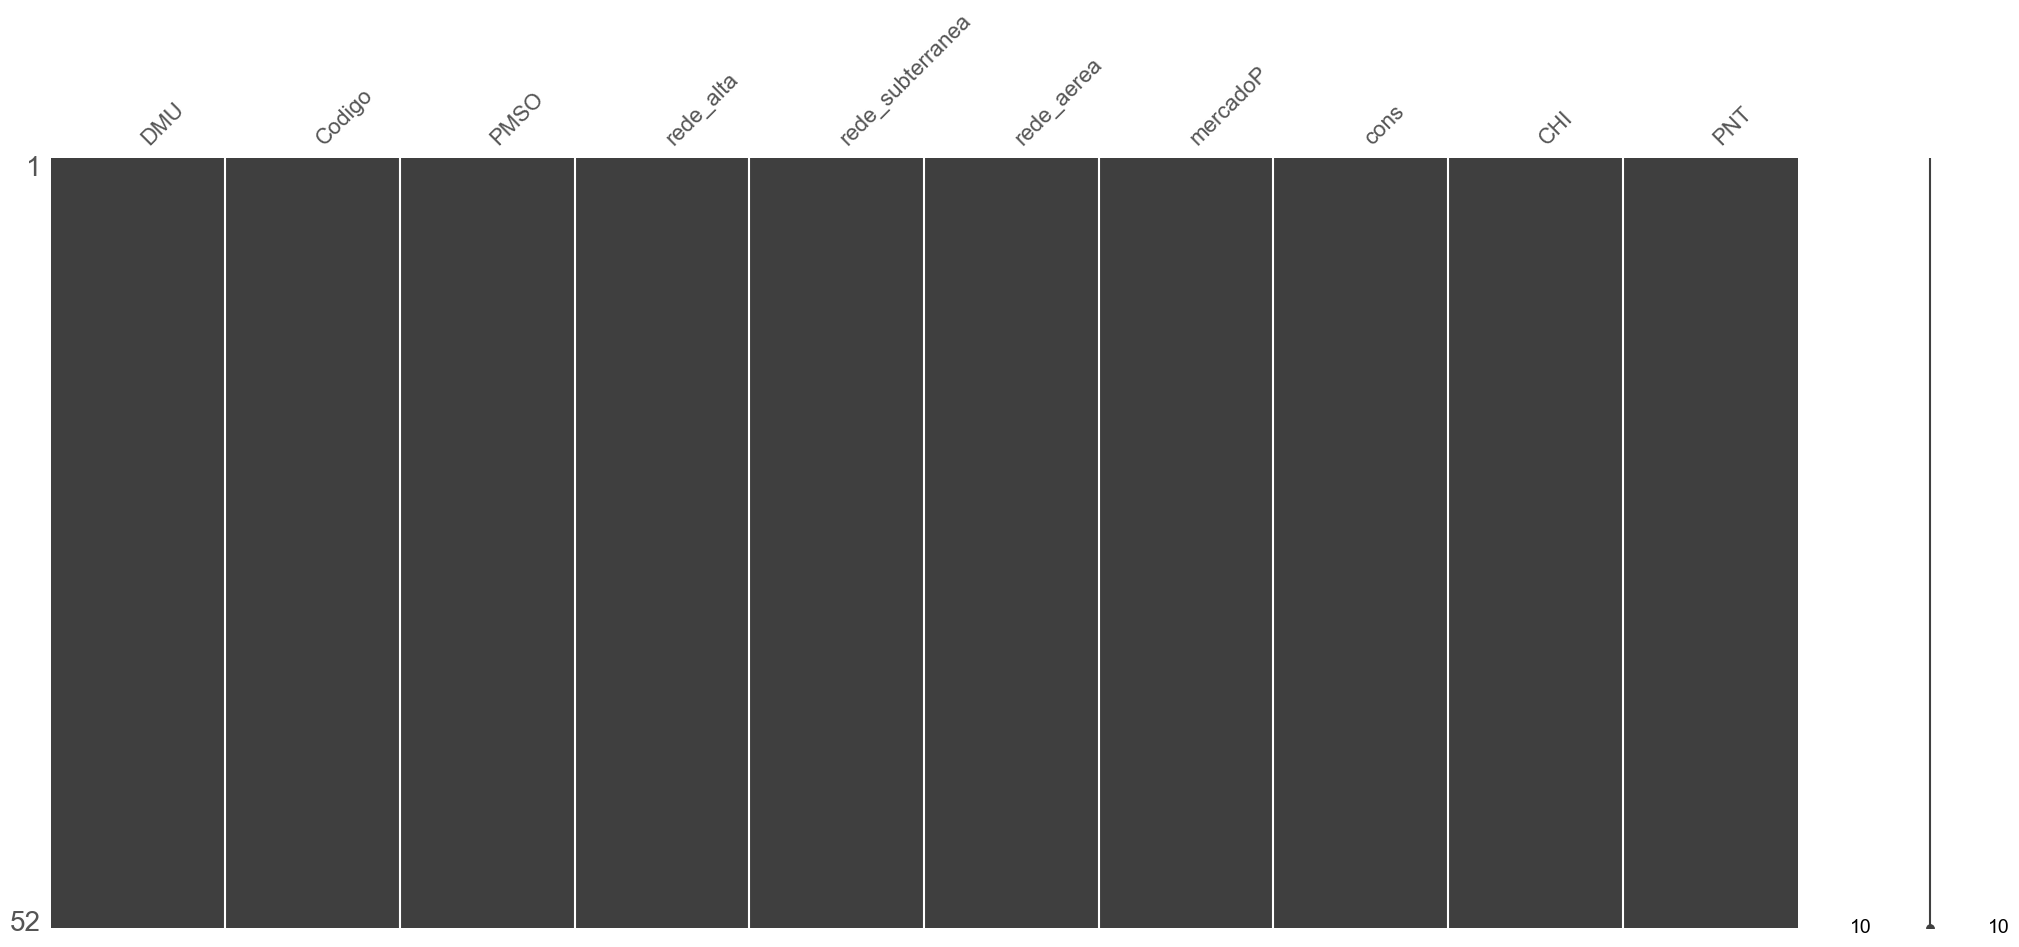

In [18]:
# Visualizando os valores ausentes no DataFrame com a biblioteca 'missingno'.
# O gráfico de matriz mostra a presença ou ausência de dados (valores não nulos) em cada coluna.
msno.matrix(dfs.sample([dfs.shape][0][0]))

## Distribuição da variavel PMSO

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

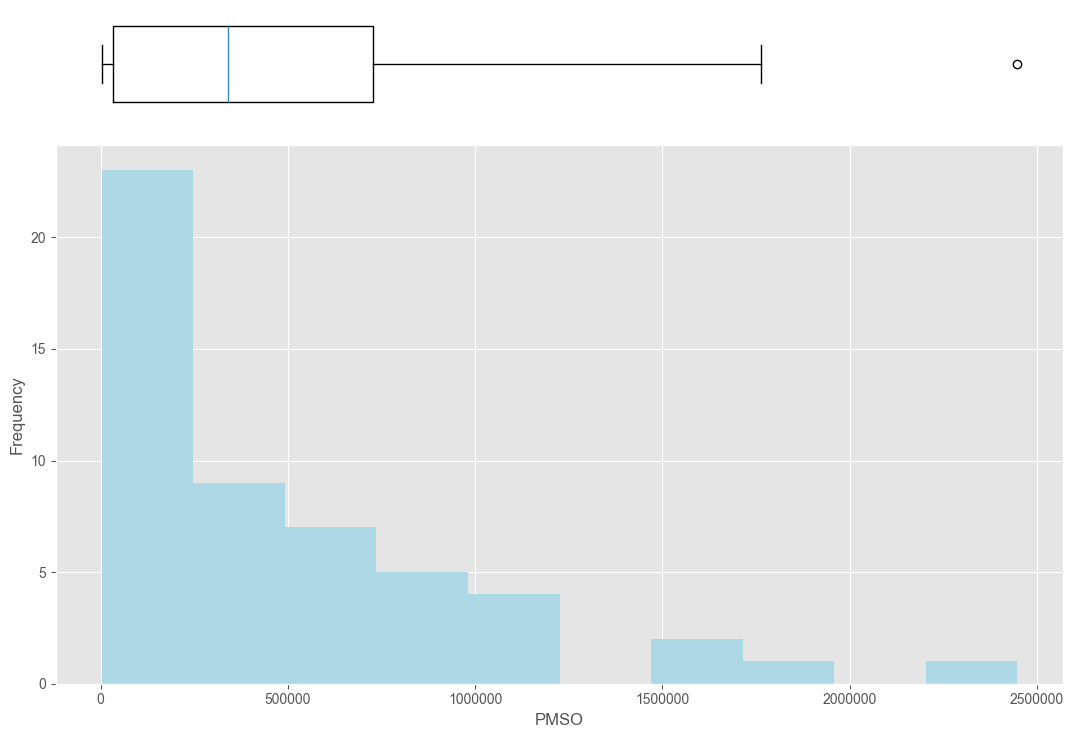

In [20]:
# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(13, 7))  

# Adicionar histograma
ax.hist(dfs['PMSO'], bins=10, color='lightblue')

# Adicionar boxplot no topo
ax_box = ax.inset_axes([0, 1.05, 1, 0.2], transform=ax.transAxes)  # Ajustar a posição do boxplot
ax_box.boxplot(dfs['PMSO'], vert=False, widths=0.7)
ax_box.axis('off')  # Remover eixos do boxplot

# Configurações do gráfico
ax.set_xlabel('PMSO')
ax.set_ylabel('Frequency')

# Ajustar o formato dos números do eixo X
ax.ticklabel_format(style='plain', axis='x')

# Rotacionar os valores do eixo X, se necessário
plt.xticks(rotation=0)

plt.show()

## Variáveis númericas X PSMO

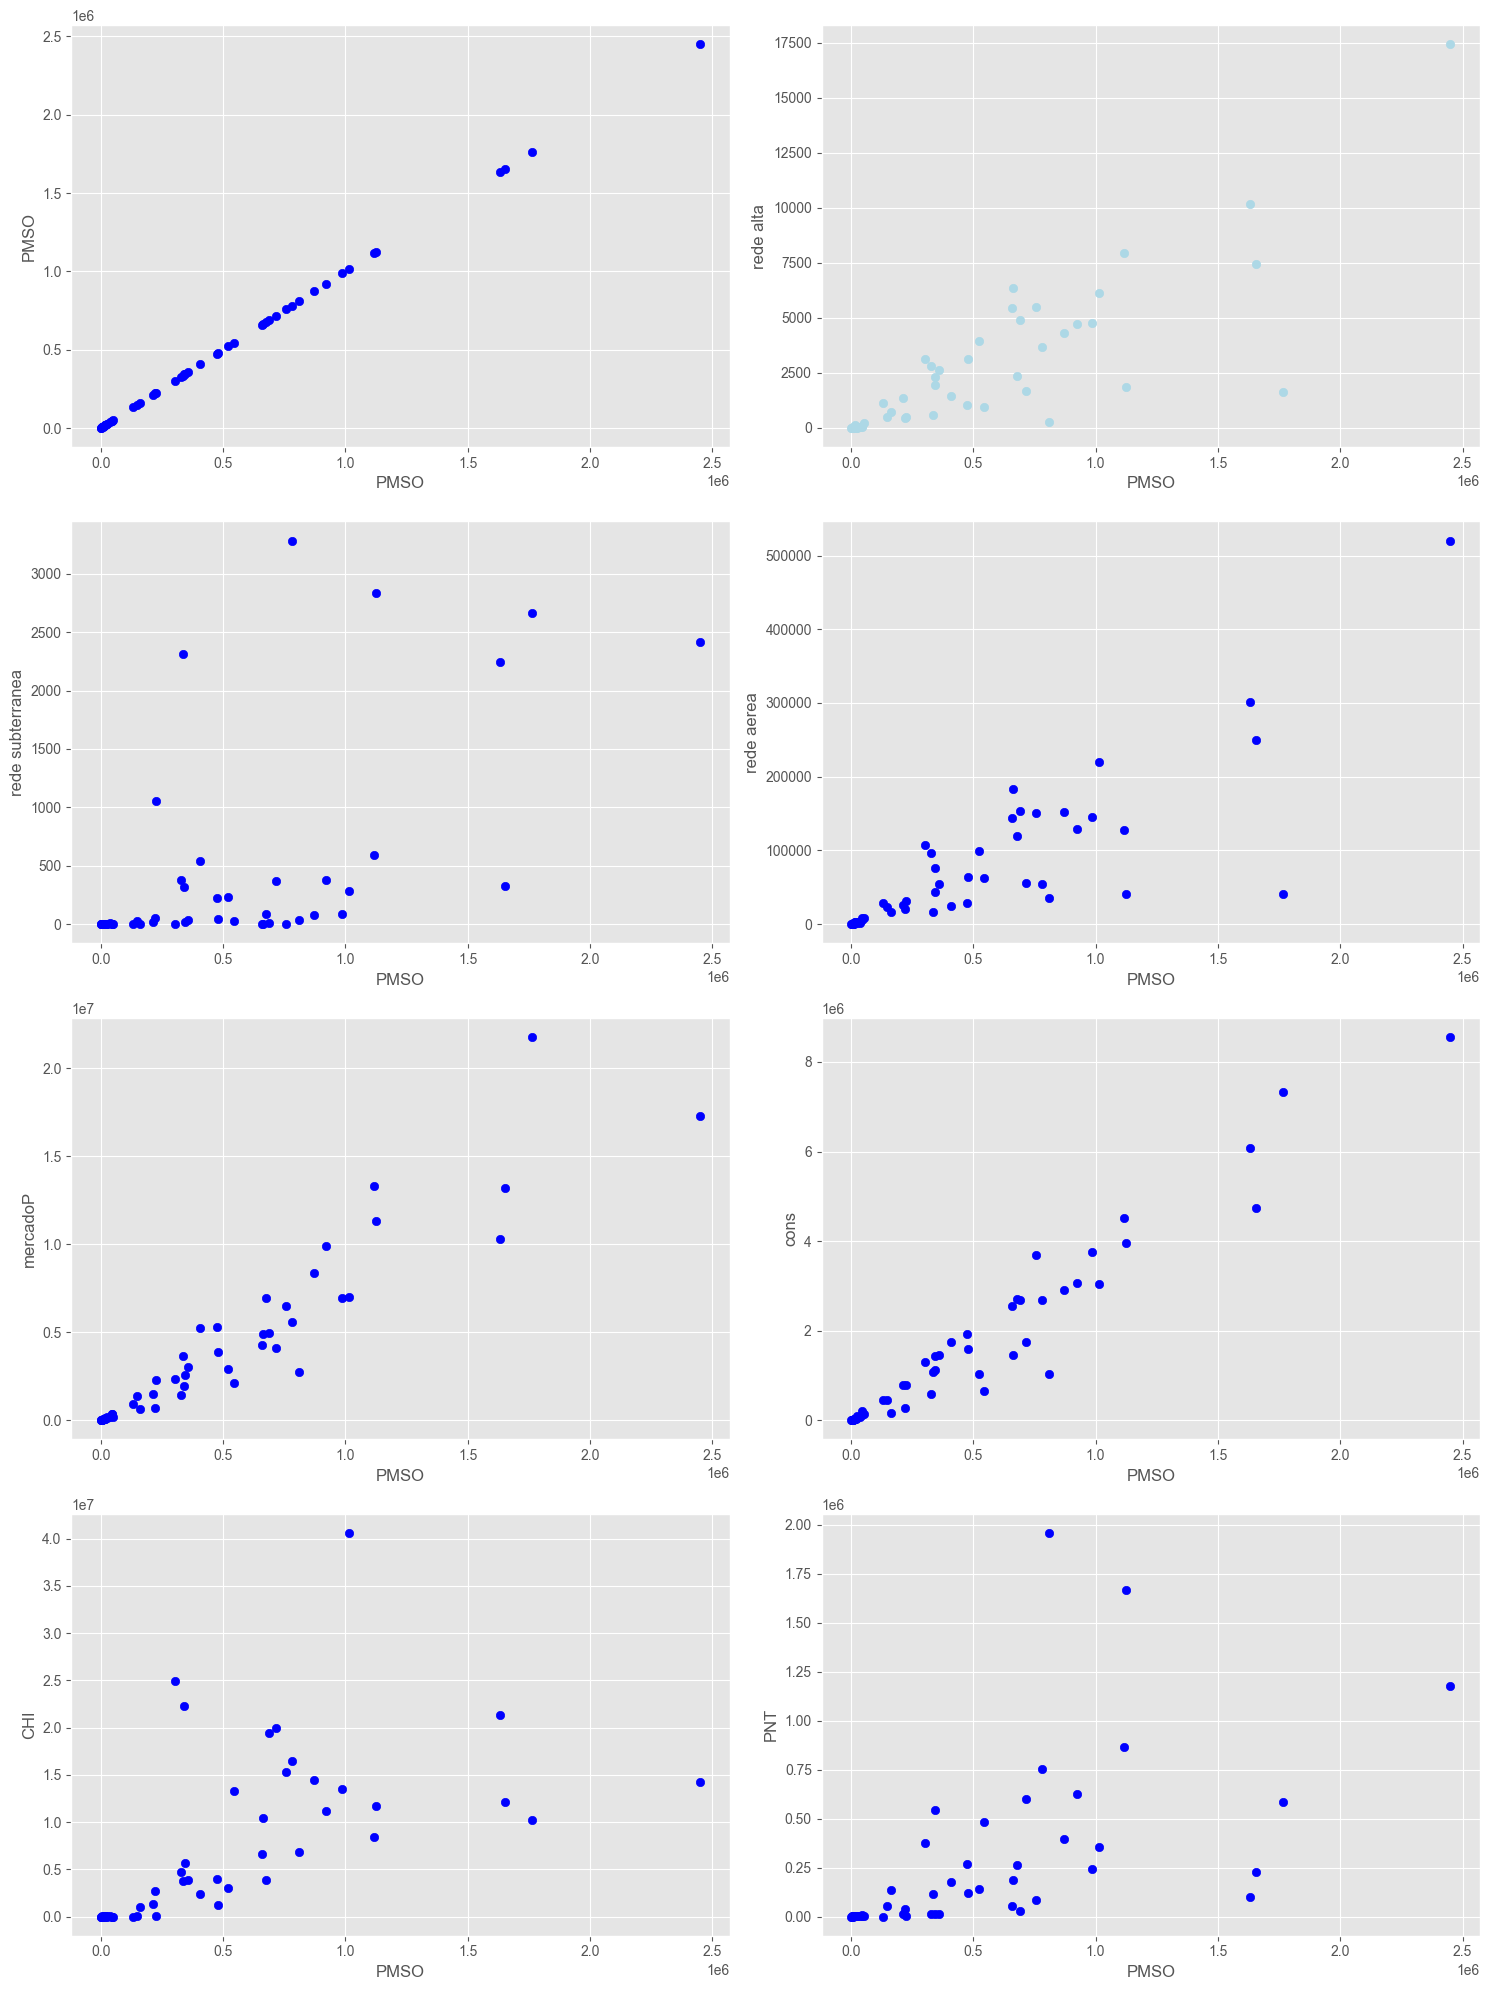

In [21]:
# Configurar o layout dos subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Criar os gráficos
axs[0, 0].scatter(dfs['PMSO'], dfs['PMSO'], color='blue', marker='o')
axs[0, 0].set_xlabel('PMSO')
axs[0, 0].set_ylabel('PMSO')

axs[0, 1].scatter(dfs['PMSO'], dfs['rede_alta'], color='lightblue', marker='o')
axs[0, 1].set_xlabel('PMSO')
axs[0, 1].set_ylabel('rede alta')

axs[1, 0].scatter(dfs['PMSO'], dfs['rede_subterranea'], color='blue', marker='o')
axs[1, 0].set_xlabel('PMSO')
axs[1, 0].set_ylabel('rede subterranea')

axs[1, 1].scatter(dfs['PMSO'], dfs['rede_aerea'], color='blue', marker='o')
axs[1, 1].set_xlabel('PMSO')
axs[1, 1].set_ylabel('rede aerea')

axs[2, 0].scatter(dfs['PMSO'], dfs['mercadoP'], color='blue', marker='o')
axs[2, 0].set_xlabel('PMSO')
axs[2, 0].set_ylabel('mercadoP')

axs[2, 1].scatter(dfs['PMSO'], dfs['cons'], color='blue', marker='o')
axs[2, 1].set_xlabel('PMSO')
axs[2, 1].set_ylabel('cons')

axs[3, 0].scatter(dfs['PMSO'], dfs['CHI'], color='blue', marker='o')
axs[3, 0].set_xlabel('PMSO')
axs[3, 0].set_ylabel('CHI')

axs[3, 1].scatter(dfs['PMSO'], dfs['PNT'], color='blue', marker='o')
axs[3, 1].set_xlabel('PMSO')
axs[3, 1].set_ylabel('PNT')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

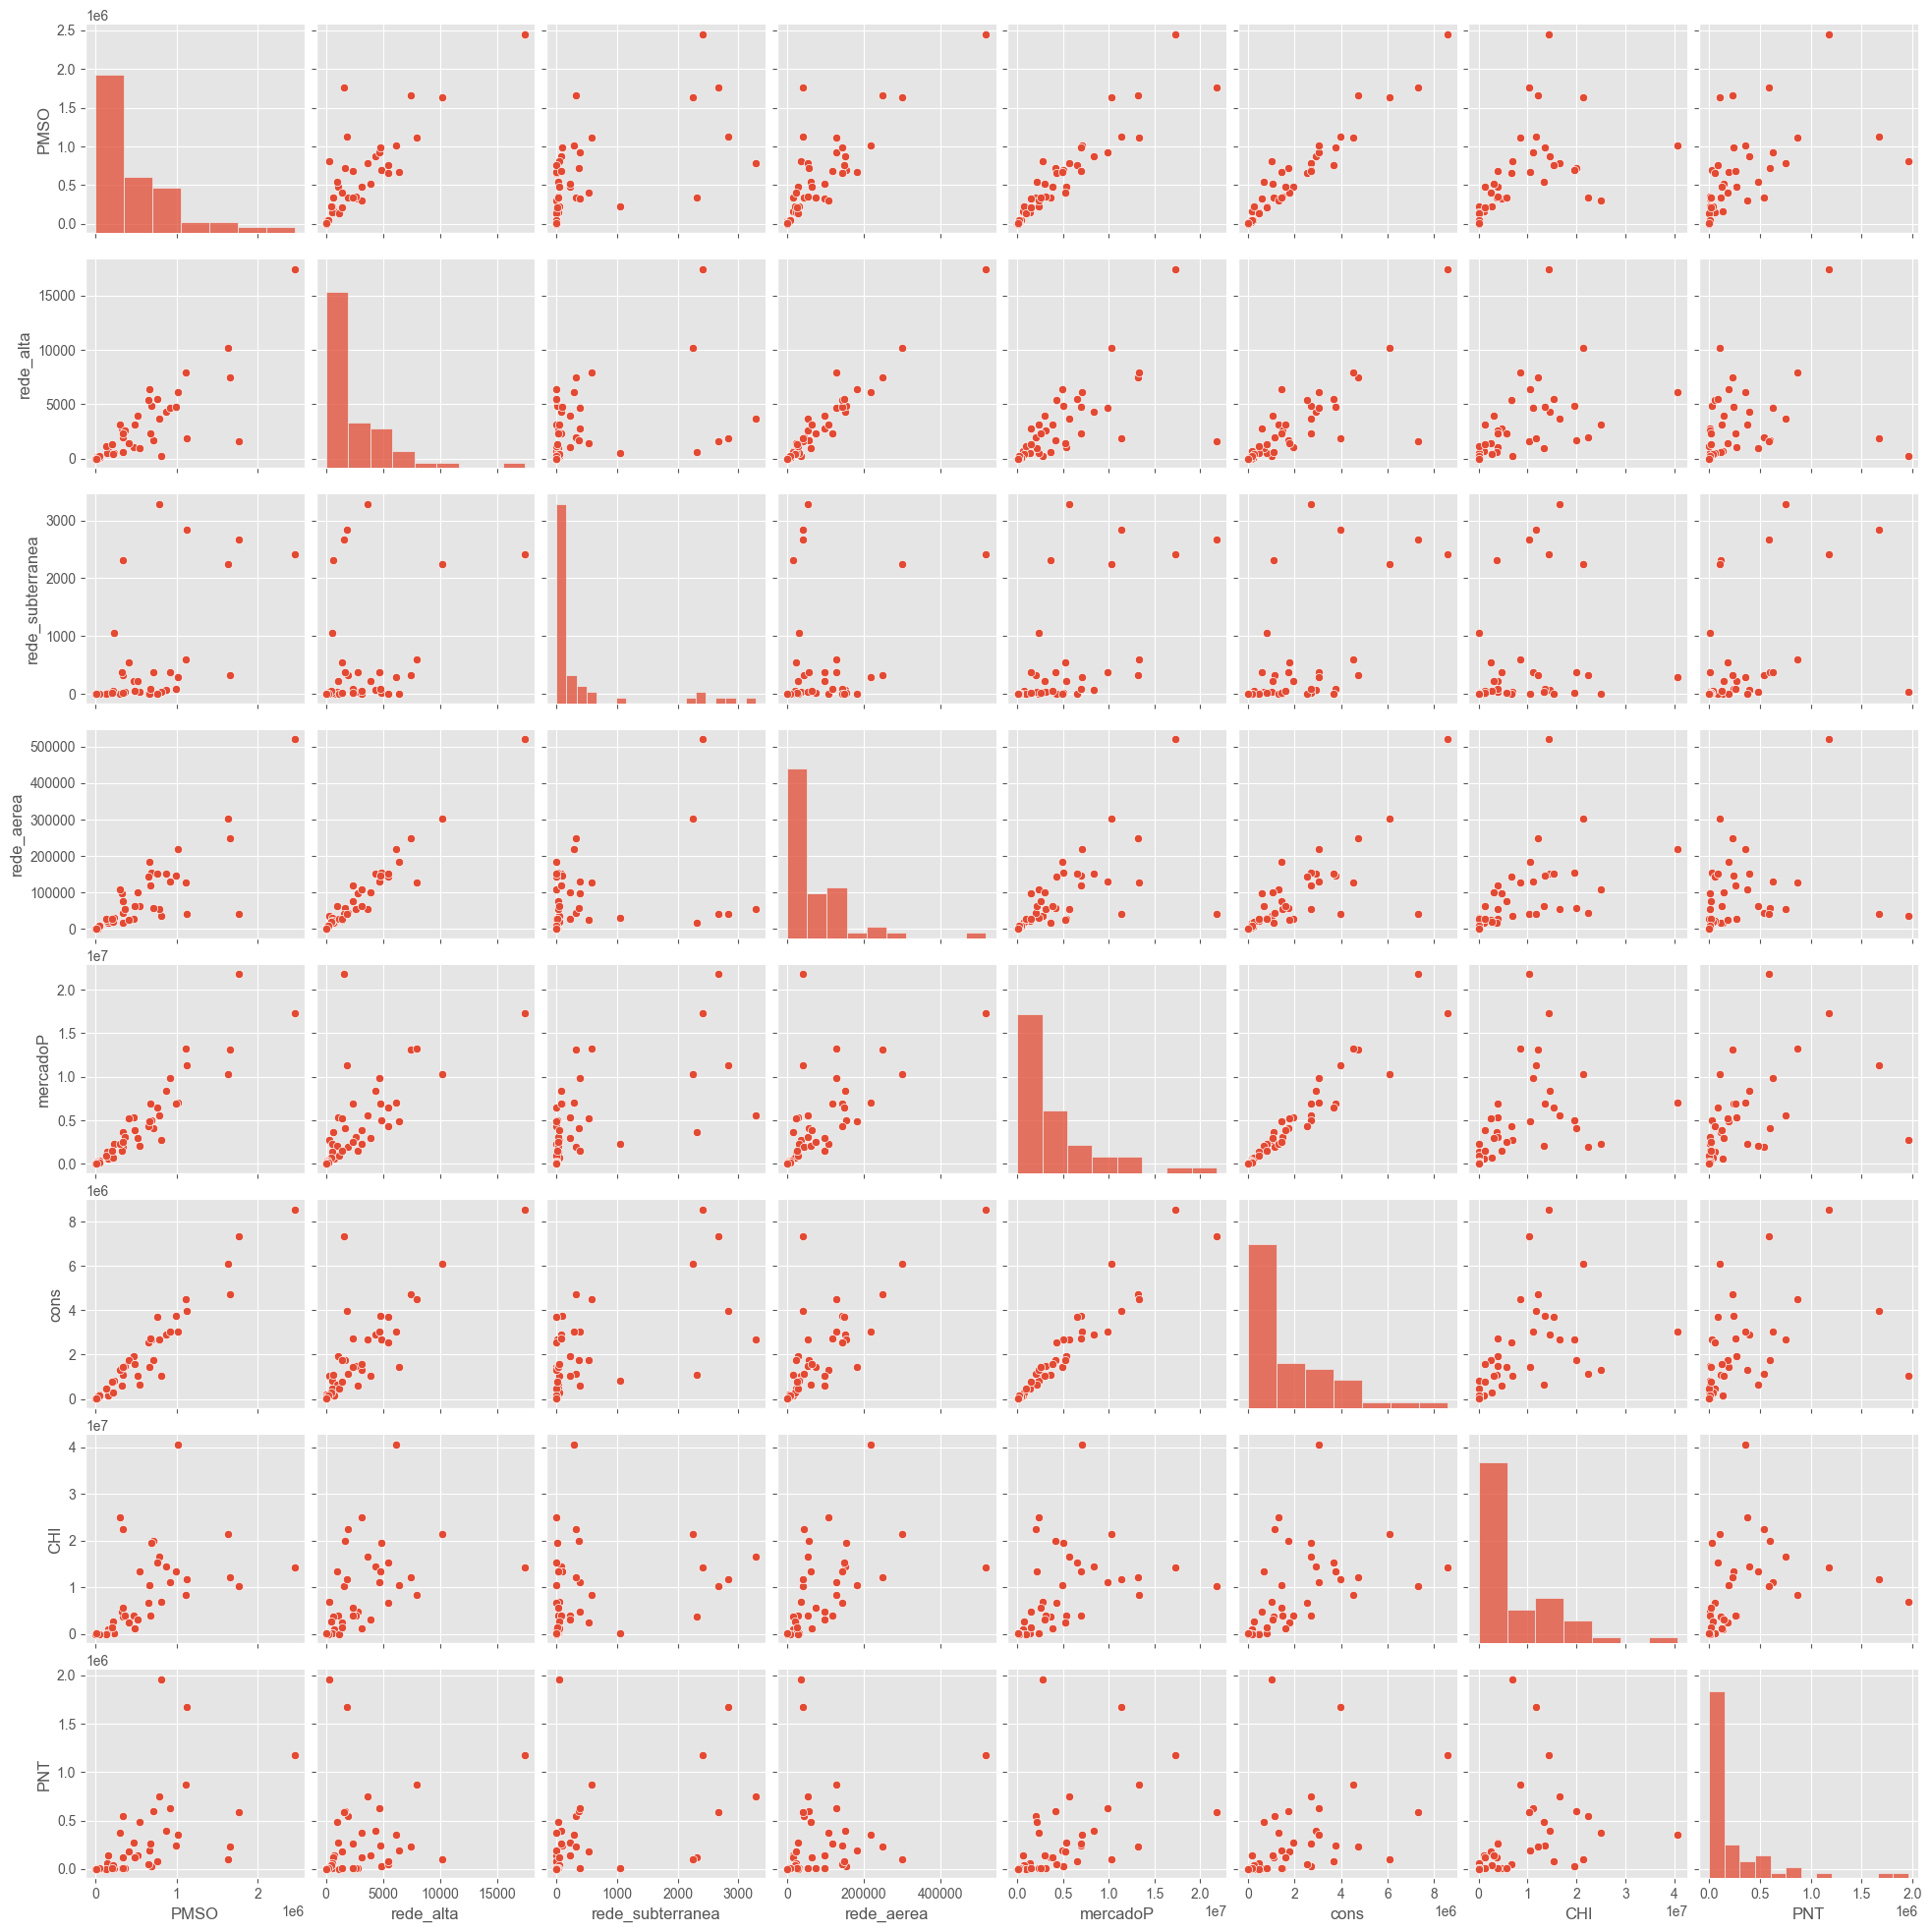

In [24]:
# Selecionar apenas colunas numéricas para a correlação
colunas_numericas = dfs.select_dtypes(include=['float64', 'int64'])
sns.pairplot(colunas_numericas)
plt.savefig("pairplot.png")

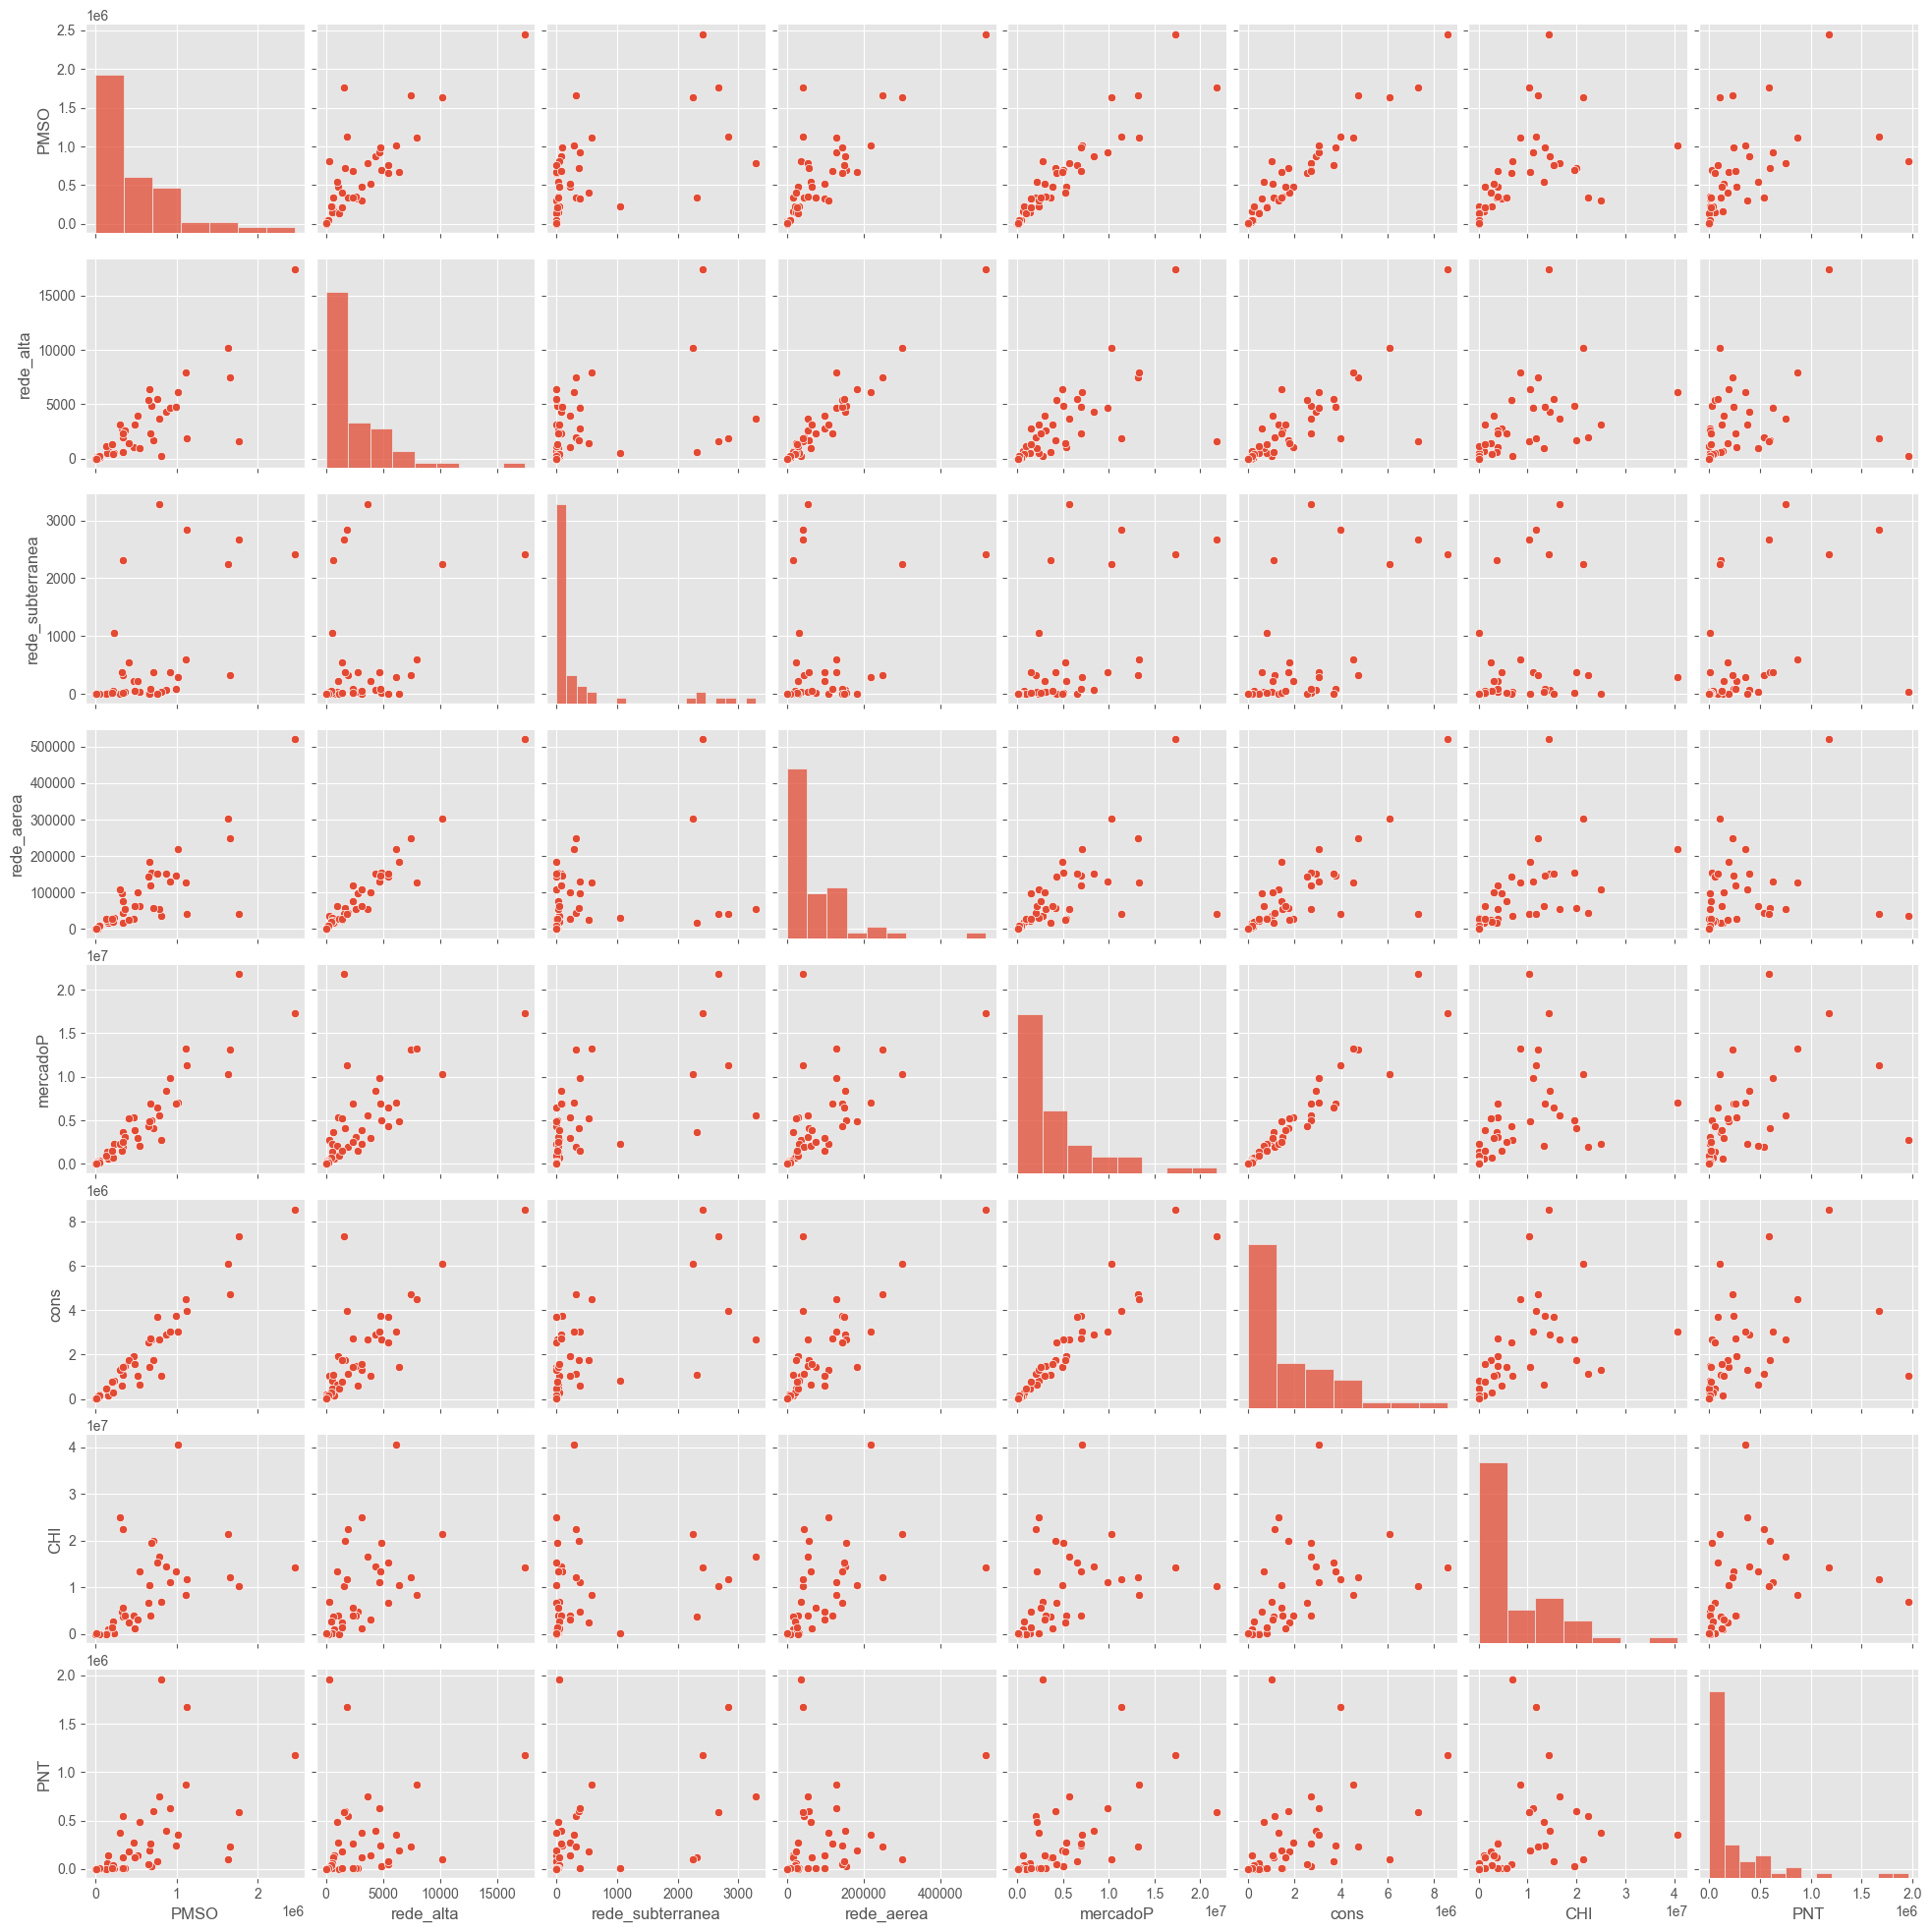

In [22]:
# Selecionar apenas colunas numéricas para a correlação
colunas_numericas = dfs.select_dtypes(include=['float64', 'int64'])
sns.pairplot(colunas_numericas)

## DMU x PSMO

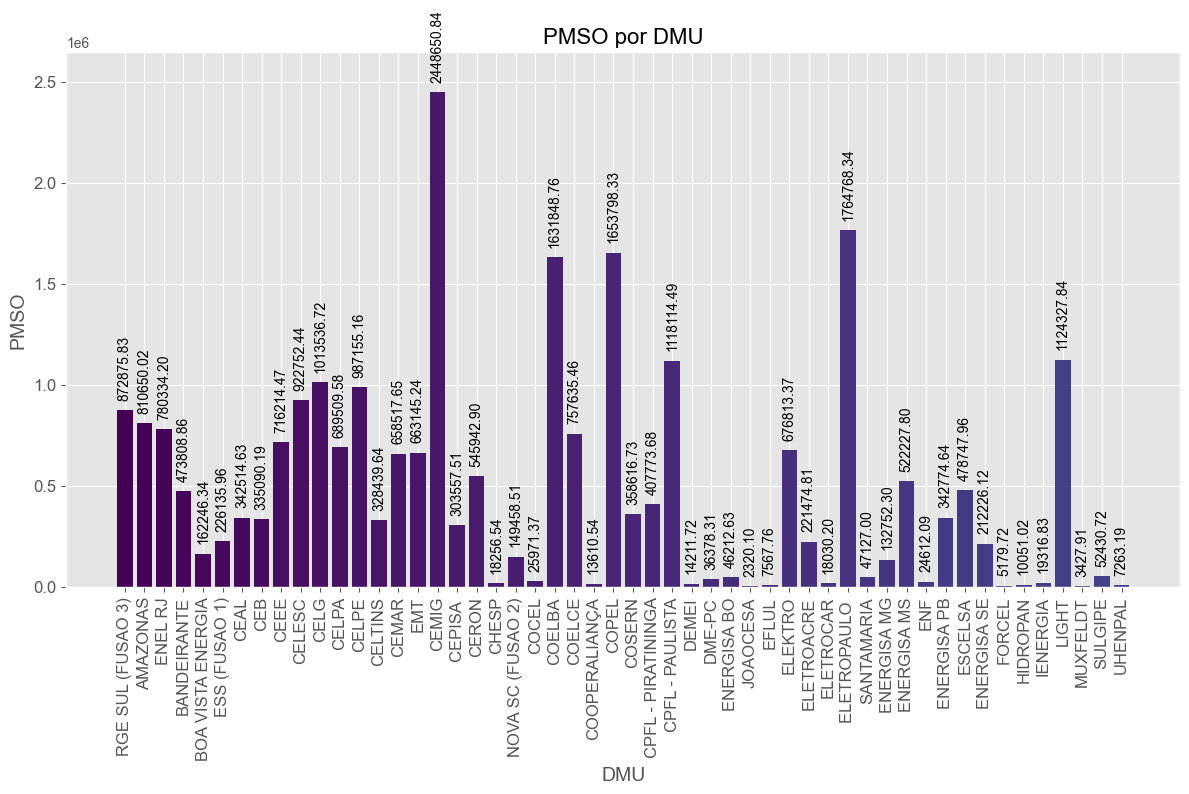

In [25]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras com uma paleta de cores mais adequada
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(range(len(dfs['DMU'])))

plt.bar(dfs['DMU'], dfs['PMSO'], color=colors)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Configurações do gráfico
plt.title('PMSO por DMU', fontsize=16)
plt.xlabel('DMU', fontsize=14)
plt.ylabel('PMSO', fontsize=14)
plt.ylim(0, dfs['PMSO'].max() + 200000)

# Adicionar valores acima das barras com rotação de 90 graus
for i, value in enumerate(dfs['PMSO']):
    plt.text(i, value + 50000, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation=90)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


## Correlação de Pearson

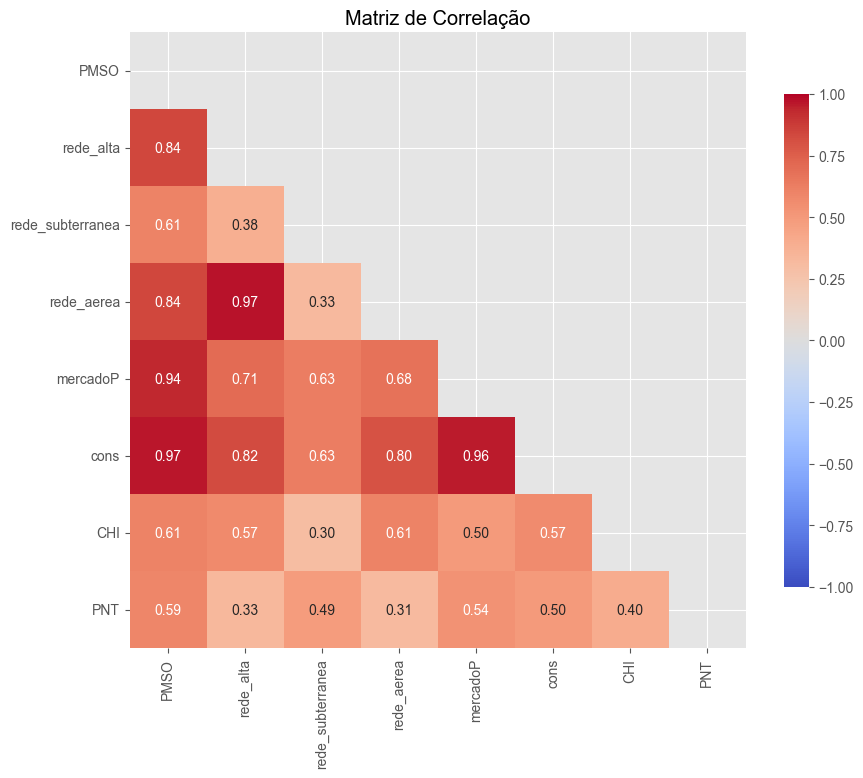

In [26]:
# Remover colunas 'DMU' e 'Codigo'
subset_df = dfs.drop(columns=['DMU', 'Codigo'])

# Calcular a matriz de correlação usando o método Pearson
correlation_matrix = subset_df.corr(method='pearson')

# Criar um gráfico de correlação usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, cbar_kws={"shrink": .8}, mask=np.triu(correlation_matrix))

# Configurações do gráfico
plt.title('Matriz de Correlação')

# Mostrar o gráfico
plt.show()

Sinais de multicolinearidade da variável PMSO com cons (0,97) e mercadoP(0,94). E as variáveis rede aerea e rede alta possuem uma alta correlação o que merece um sinal de alerta 

## Teste de shapiro-wilk para vericar normalidade 

In [27]:
# Teste de normalidade de Shapiro-Wilk
shapiro_test = stats.shapiro(dfs.PMSO)
print(f"Shapiro-Wilk normality test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

Shapiro-Wilk normality test: W=0.8286572694778442, p-value=2.9977438771311427e-06


# Modelos

## Modelo com todas as variáveis

In [28]:
# Modelo 1
X1 = dfs[['rede_alta', 'rede_subterranea', 'rede_aerea', 'mercadoP', 'cons', 'CHI', 'PNT']]
y1 = dfs['PMSO']
X1 = sm.add_constant(X1)
modelo1 = sm.OLS(y1, X1).fit()

# Calcular VIF para o modelo 1
vif_modelo1 = calculate_vif(X1)
print("VIF do Modelo 1:")
print(vif_modelo1)
# Mostrar o resumo do modelo
print(modelo1.summary())

VIF do Modelo 1:
            feature    VIF
0             const  1.898
1         rede_alta 21.951
2  rede_subterranea  2.146
3        rede_aerea 22.073
4          mercadoP 19.918
5              cons 33.588
6               CHI  1.799
7               PNT  1.613
                            OLS Regression Results                            
Dep. Variable:                   PMSO   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     304.9
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           4.11e-35
Time:                        17:43:22   Log-Likelihood:                -657.87
No. Observations:                  52   AIC:                             1332.
Df Residuals:                      44   BIC:                             1347.
Df Model:                           7                                         
Covariance Type:            n

Interpretação:


rede_alta: p=0.021 significativo.</br>
rede_subterranea: p=0.288 não significativo </br>
rede_aerea: p<0.001 altamente significativo </br>
mercadoP: p=0.001 significativo. </br>
cons: p=0.009 significativo . </br>
CHI: p=0.846 não significativo. </br>
PNT: p<0.001 altamente significativo. </br>
</br>
Exceto a váriavel rede_alta, as demais impactam aumentando,ou seja, ou aumento de rede_aerea aumenta o PMSO</br>
</br>
R-squared (R²): 0.980 indica que 98%</br>
Adj. R-squared (R² ajustado): 0.977</br>
</br>
Kurtosis: 4.123 indica que tem uma calda mais pretuberante.Isso já era esperado.</br>
Durbin-Watson: 2.270, indica que não há autocorrelação dos resíduos.</br>
Outro destaque merece ser feito é na presença de multicolinearidade no modelo com todas as variáveis. Quando olhamos para o resultado VIF, vemos as varaiveis:</br>
rede_alta = 21.951</br>
rede_aerea = 22.073</br>
mercadoP = 19.918</br>
cons = 33.588</br>
Com valores que indicam multicolinearidade. Algo esperado tendo em vista o resultado da correlação de pearson </br>

## Modelo 2 - sem as variáveis de multicolinearidade

In [29]:
# Modelo 2
X2 = dfs[['rede_aerea','rede_subterranea', 'CHI', 'PNT']]
y2 = dfs['PMSO']
X2 = sm.add_constant(X2)
modelo2 = sm.OLS(y2, X2).fit()

# Calcular VIF para o modelo 2
vif_modelo2 = calculate_vif(X2)
print("\nVIF do Modelo 2:")
print(vif_modelo2)

print("\nResumo do Modelo 2:")
print(modelo2.summary())


VIF do Modelo 2:
            feature   VIF
0             const 1.820
1        rede_aerea 1.643
2  rede_subterranea 1.375
3               CHI 1.714
4               PNT 1.448

Resumo do Modelo 2:
                            OLS Regression Results                            
Dep. Variable:                   PMSO   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     81.65
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.50e-20
Time:                        17:44:14   Log-Likelihood:                -705.42
No. Observations:                  52   AIC:                             1421.
Df Residuals:                      47   BIC:                             1431.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
               

R-squared (R²): 0.874</br>
87.4% da variabilidade do PMSO é explicada pelo modelo</br>
</br>
rede_aerea p<0.001 altamente significativo
rede_subterranea: p=0.001 altamente significativo </br>
CHI: p=0.635 não é significativo. </br>
PNT: p<0.001 altamente  significativo . </br>
</br>
Omnibus: 45.508 com p<0.001. Indica que os resíduos não seguem uma distribuição normal, sugerido por uma alta assimetria e curtose.</br>
Jarque-Bera (JB): 212.260 com p<0.001. Confirma a não normalidade dos resíduos.</br>
Durbin-Watson: 1.963 está próximo de 2, isso indica pouca ou nenhuma autocorrelação dos resíduos.</br>
</br>
rede_subterranea (1.375), CHI (1.714), PNT (1.448). Todos os valores de VIF estão abaixo de 10, indicando baixa ou nenhuma multicolinearidade.</br>

## Modelo 3- sem variáveis não significativas e sem as variáveis de multicolinearidade

In [34]:
# Modelo 3
X3 =  dfs[['rede_aerea','rede_subterranea', 'PNT']]
y3 = dfs['PMSO']

X3 = sm.add_constant(X3)
modelo3 = sm.OLS(y3, X3).fit()

# Calcular VIF para o modelo 3
vif_modelo3 = calculate_vif(X3)


print("\nVIF do Modelo 3:")
print(vif_modelo3)

print("\nResumo do Modelo 3:")
print(modelo3.summary())


VIF do Modelo 3:
            feature   VIF
0             const 1.714
1        rede_aerea 1.160
2  rede_subterranea 1.375
3               PNT 1.360

Resumo do Modelo 3:
                            OLS Regression Results                            
Dep. Variable:                   PMSO   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.46e-21
Time:                        17:46:33   Log-Likelihood:                -705.55
No. Observations:                  52   AIC:                             1419.
Df Residuals:                      48   BIC:                             1427.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err   

O R-squared do modelo caiu indicando que a remoção da variável CHI não impactou. Portanta vamos selecionar o modelo 3 como o mais adequado. 

# Melhor Modelos

In [31]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Modelo 3
X2 = dfs[['rede_aerea','rede_subterranea', 'PNT']]
y2 = dfs['PMSO']
X2 = sm.add_constant(X2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

modelo = sm.OLS(y2, X2).fit()

# Calcular VIF para o modelo 2
vif_model = calculate_vif(X2)
print("\nVIF do Melhor Modelo:")
print(vif_model)

print("\nResumo do Melhor Modelo:")
print(modelo.summary())


VIF do Melhor Modelo:
            feature   VIF
0             const 1.714
1        rede_aerea 1.160
2  rede_subterranea 1.375
3               PNT 1.360

Resumo do Melhor Modelo:
                            OLS Regression Results                            
Dep. Variable:                   PMSO   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           1.46e-21
Time:                        17:48:19   Log-Likelihood:                -705.55
No. Observations:                  52   AIC:                             1419.
Df Residuals:                      48   BIC:                             1427.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    

## Análise de Resíduos

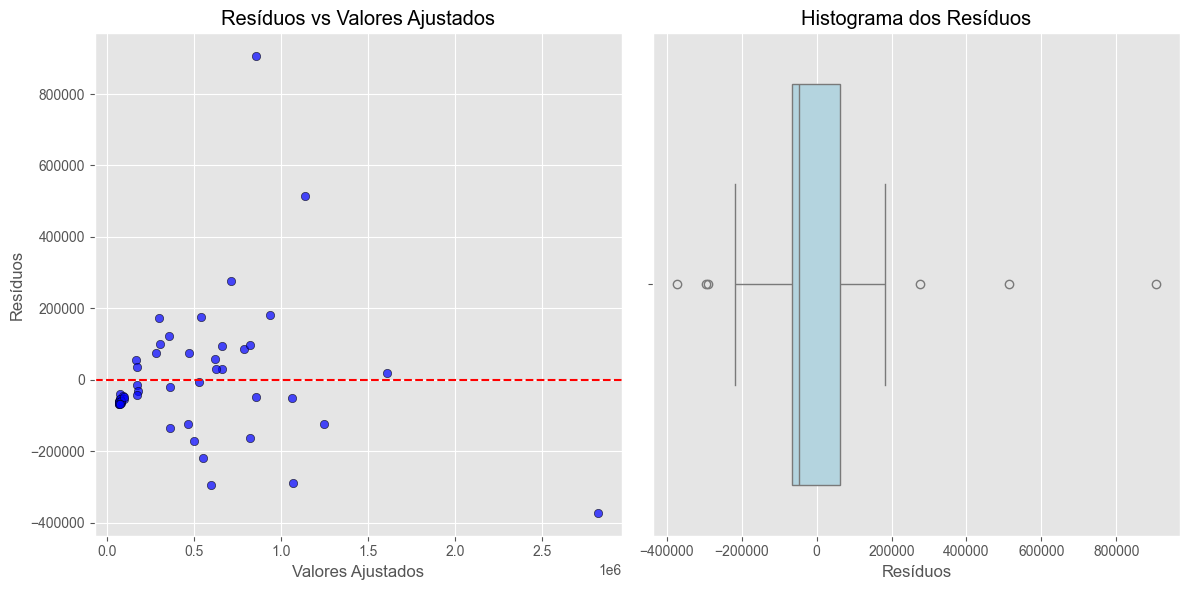

Shapiro-Wilk normality test: W=0.7887091040611267, p-value=3.2705284525036404e-07


In [37]:
# Selecionar as variáveis independentes e a variável dependente
X = dfs[['rede_aerea','rede_subterranea', 'PNT']]
y = dfs['PMSO']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Plotagem dos resíduos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(modelo.fittedvalues, modelo.resid, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

# Histograma e boxplot dos resíduos
plt.subplot(1, 2, 2)
#sns.histplot(modelo.resid, kde=True, color='lightblue')
sns.boxplot(x=modelo.resid, color='lightblue')
plt.xlabel('Resíduos')
plt.title('Histograma dos Resíduos')

plt.tight_layout()
plt.show()

# Teste de normalidade de Shapiro-Wilk
shapiro_test = stats.shapiro(modelo.resid)
print(f"Shapiro-Wilk normality test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

A variação dos resíduos aumenta com os valores ajustados, indicando heterocedasticidade. Isso sugere que a variância dos erros não é constante ao longo dos valores preditos indo contra a suposição de homocedasticidade do modelo

O histograma com boxplot dos resíduos deve idealmente se aproximar de uma distribuição normal (sino). No entanto, a distribuição é assimétrica e não segue uma distribuição normal. Confirmamos isso com o teste de Shapiro-Wilk e Jarque-Bera(JB)

## Analise preditiva do modelo

In [39]:
# Selecionar as variáveis independentes e a variável dependente
X = dfs[['rede_aerea','rede_subterranea', 'PNT']]
y = dfs['PMSO']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)
# Previsões com LOOCV
yhat = np.empty(len(dfs))

for cont in range(len(dfs)):
    X_train = X.drop(cont)
    y_train = y.drop(cont)
    modelo = sm.OLS(y_train, X_train).fit()
    X_test = X.iloc[cont].values.reshape(1, -1)
    yhat[cont] = modelo.predict(X_test)[0]  # Extrair o valor escalar

# Calcular SQT e SQe
SQT = np.sum((y - np.mean(y)) ** 2)
SQe = np.sum((y - yhat) ** 2)

# Calcular o R^2 preditivo
R2_pred = 1 - SQe / SQT
print(f"R^2 preditivo: {R2_pred}")

R^2 preditivo: 0.8028547064815165


R² Preditivo:0.8028

O valor de 80,28% da variação no PMSO é explicada pelas variáveis preditoras no conjunto de validação. Este valor sugere um desempenho bom do modelo na previsão de novos dados. É um modelo com uma boa capacidade de generalização

In [42]:
# Ajustar o modelo de regressão linear com todos os dados
modelo_final = sm.OLS(y, X).fit()

# Fazer a previsão para a primeira observação com intervalo de confiança de 95% e previsão
newdata = X.iloc[0].values.reshape(1, -1)
prediction = modelo_final.get_prediction(newdata)
prediction_summary = prediction.summary_frame(alpha=0.05)  # 95% de intervalo

print(prediction_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0 787471.168 42806.009     701403.918     873538.417    382764.213   

   obs_ci_upper  
0   1192178.122  


# Conclusão